Bima 1


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#!pip install librosa
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/data/data"))

# Any results you write to the current directory are saved as output.

['fma_genre_spectrograms', 'multitask_dataset', 'fma_genre_spectrograms_beat', 'multitask_dataset_beat']


**Βήμα 2α και 2β: **Διάβασμα specs και chromagrams για 2 samples που ανήκουν σε διαφορετική κατηγορία (συγκεκριμένα διαβάζουμε τα samples με ids: 1044 και 16277.


In [2]:
import gzip

train_labels = pd.read_csv('../input/data/data/fma_genre_spectrograms/train_labels.txt',header=0,sep='\t')
train_labels=np.asarray(train_labels)
#x=train_labels[:,1]=='Classical'
#print(train_labels[x])
spectrogram1_file = '../input/data/data/fma_genre_spectrograms/train/16277.fused.full.npy.gz'
spectrogram2_file = '../input/data/data/fma_genre_spectrograms/train/1044.fused.full.npy.gz'

with gzip.GzipFile(spectrogram1_file, 'r') as f:
    spectrograms1 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram1 = spectrograms1[:128]
chromagram = spectrograms1[128:]

with gzip.GzipFile(spectrogram2_file, 'r') as f:
    spectrograms2 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram2 = spectrograms2[:128]

print("Genre of song with id 16277: ",train_labels[train_labels[:,0]=='16277.fused.full.npy.gz',1])
print("Genre of song with id 1044: ",train_labels[train_labels[:,0]=='1044.fused.full.npy.gz',1])


Genre of song with id 16277:  ['Classical']
Genre of song with id 1044:  ['Blues']


**Βήμα 2γ:** Για τα 2 αρχεία που διαβάσαμε παραπάνω και πήραμε τα mel spectrograms τους, τωρα τα απεικονίζουμε.

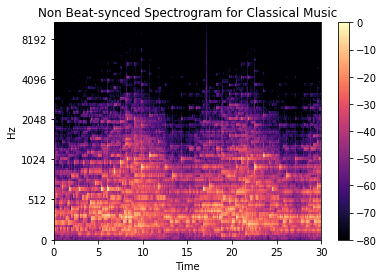

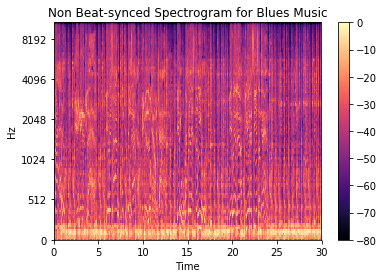

In [3]:
import librosa.display
import matplotlib.pyplot as plt

#gia to mel spectrogram me id 10044 (Classical)
plt.figure(1)
librosa.display.specshow(mel_spectrogram1,x_axis='time',y_axis='mel')
plt.colorbar()
plt.title("Non Beat-synced Spectrogram for Classical Music")
#gia to mel spectrogram me id 1044 (Blues)
plt.figure(2)
librosa.display.specshow(mel_spectrogram2,x_axis='time',y_axis='mel')
plt.colorbar()
plt.title("Non Beat-synced Spectrogram for Blues Music")
plt.show()

**Σχολιασμός:** Εκεί όπου το spectrogram εμφανίζεται πιο κίτρινο είναι ουσιαστικά τα peaks που έχουμε στο spectrogram. Με βάση τον κατακόρυφο άξονα προσδιορίζουμε την συχνότητα του ήχου (σε mel κλίμακα), ενώ με βάση τον οριζόντιο την χρονική στιγμή (ή και χρονική διάρκεια - αν εμφανίζεται κατά μήκος του άξονα αυτού). Παρατηρούμε ότι στο πρώτο spectrogram δεν έχουμε peaks σε όλο το φάσμα συχνοτήτων. Μάλιστα παρατηρούμε οτι για συγκεκριμένο φάσμα συχνοτήτων έχουμε μικρή χρονική διάρκεια. Αυτό συμβαίνει γιατι στην κλασική μουσική είναι πιο συχνές οι μεμονωμένες νότες (άρα και μικρό φάσμα συχνοτήτων) και η μικρή διάρκεια αυτών (αρα και περιορισμένο "κιτρίνισμα "-peaks κατά μήκος του οριζόντιου άξονα). Αντιθέτως, στην δεύτερη περίπτωση όπου έχουμε blues παρατηρούμε πιο μεγάο φάσμα συχνοτήτων να εμφανίζουν peaks την ίδια χρονική στιγμή. Επίσης παρατηρούμε ότι υπάρχει εκτεταμένο "κιτρίνισμα"-peaks κατά μήκος του οριζόντιου άξονα. Τα παραπάνω είναι απολύτως λογικά αφού η blues μουσική περιλαμβάνει περισσότερες συγχορδίες (δηλαδή συνδυασμό μεμονωμένων νοτών) με αποτέλεσμα να εμφανίζονται peaks σχεδόν σε όλο το μήκος του κατακόρυφου άξονα και επίσης υπάρχει μεγαλύτερη διάρκεια στον ήχο της συγχορδίας και για αυτό εμφανίζονται κίρτινες γραμμές κατά μήκος του οριζόντιου άξονα. Επίσης δεν είναι τυχαίο που στο δεύτερο spectrogram φαίνεται να υπάρχουν κάθετες κίτρινες γραμμές. Αυτό συμβαίνει γιατί οι συγχορδίες "πέφτουν" πάνω στον ρυθμό των drums δηλαδή στο ισχυρό beat.

**Βήμα 3:** Χρήση beat-synced spectrograms

Παρακάτω βλέπουμε τις διαστάσεις των mel-specs που χρησιμοποιήσαμε και σχολιάζουμε τα αποτελέσματα.
Στην συνέχεια συγχρονίζουμε τα spectrograms πάνω στο beat και ακολουθεί ο αντίστοιχος σχολιασμός.


In [4]:
#mel_spectrogram shape of Classical music
print("Size of spectrogram for Classical Music: ",mel_spectrogram1.shape)
#mel_spectrogram shape of Blues music
print("Size of spectrogram for Blues Music: ",mel_spectrogram2.shape)

Size of spectrogram for Classical Music:  (128, 1293)
Size of spectrogram for Blues Music:  (128, 1291)


Παρατηρούμε οι και τα 2 spectrograms έχουν περίπου 1290 timesteps. Κρατώντας τόσο μεγάλη πληροφορία στον χρόνο δεν είναι ρεαλιστικό να εκπαιδεύσουμε ένα lstm καθώς είναι αρκετά δύσκολο να θυμάται πληροφορία απο 1290 timesteps.

Έτσι λοιπόν θα συγχρονίσουμε τα spectrograms πάνω στο beat και θα μειώσουμετον αριθμό των timesteps. Ο παραπάνω συγχρονισμός γίνεται παίρνοντας τον median ανάμεσα στα σημεία που πεφτει το beat της μουσικής.Παρακάτω επαναλαμβανουμε την διαδικασία που ακολουθήσαμε και σχολιάζουμε τα αποτελέσματα.

In [5]:
train_labels = pd.read_csv('../input/data/data/fma_genre_spectrograms_beat/train_labels.txt',header=0,sep='\t')
train_labels=np.asarray(train_labels)
#x=train_labels[:,1]=='Classical'
#print(train_labels[x])
spectrogram1_file = '../input/data/data/fma_genre_spectrograms_beat/train/16277.fused.full.npy.gz'
spectrogram2_file = '../input/data/data/fma_genre_spectrograms_beat/train/1044.fused.full.npy.gz'

with gzip.GzipFile(spectrogram1_file, 'r') as f:
    spectrograms1 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram1 = spectrograms1[:128]
chromagram = spectrograms1[128:]

with gzip.GzipFile(spectrogram2_file, 'r') as f:
    spectrograms2 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram2 = spectrograms2[:128]

print("Genre of song with id 16277: ",train_labels[train_labels[:,0]=='16277.fused.full.npy.gz',1])
print("Genre of song with id 1044: ",train_labels[train_labels[:,0]=='1044.fused.full.npy.gz',1])

Genre of song with id 16277:  ['Classical']
Genre of song with id 1044:  ['Blues']


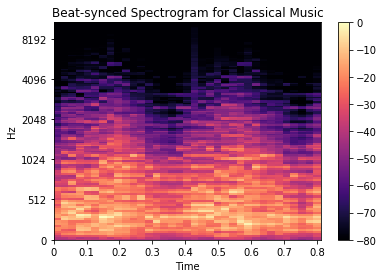

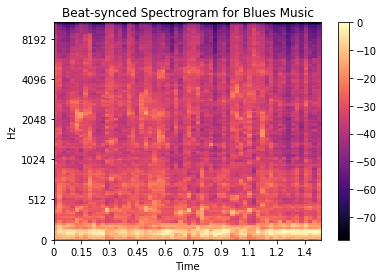

In [6]:

import matplotlib.pyplot as plt

#gia to mel spectrogram me id 10044 (Classical)
plt.figure(1)
librosa.display.specshow(mel_spectrogram1,x_axis='time',y_axis='mel')
plt.colorbar()
plt.title("Beat-synced Spectrogram for Classical Music")
#gia to mel spectrogram me id 1044 (Blues)
plt.figure(2)
librosa.display.specshow(mel_spectrogram2,x_axis='time',y_axis='mel')
plt.colorbar()
plt.title("Beat-synced Spectrogram for Blues Music")
plt.show()

Βλέπουμε ότι οι παρατηρλησεις που κάναμε προηγουμένως τώρα γίνονται πιο εμφανείς.Στο πρώτο spectrogram το φάσμα συγχοντήτων είναι μικρό και μάλιστα γίνεται πιο εμφανές το γεγονός ότι οι νότες έχουν μικρότερη διάρκεια. Στην διάρκεια του χρόνου υπάρχει διαφοροποίηση στα peaks των συχνοτήτων. Αντιθέτως στην δεύτερη περίπτωση το φάσμα συχνοτήτων είναι μεγαλύτερο λόγω συγχορδιών, όπως αναφέραμε, και φαίνεται καλύτερα οτι υπάρχει διάρκεια των peaks στον χρόνο.

**Βημα 3:** Εξοικείωση με χρωμογράμματα.

Επαναλαμβάνουμε τα παραπάνω με χρήση χρωμογραμμάτων και σχολιάζουμε τα αποτελέσματα.

Για τα *non beat-sync chromagrams* έχουμε:

In [7]:
train_labels = pd.read_csv('../input/data/data/fma_genre_spectrograms/train_labels.txt',header=0,sep='\t')
train_labels=np.asarray(train_labels)
#x=train_labels[:,1]=='Classical'
#print(train_labels[x])
spectrogram1_file = '../input/data/data/fma_genre_spectrograms/train/16277.fused.full.npy.gz'
spectrogram2_file = '../input/data/data/fma_genre_spectrograms/train/1044.fused.full.npy.gz'

with gzip.GzipFile(spectrogram1_file, 'r') as f:
    spectrograms1 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram1 = spectrograms1[:128]
chromagram1 = spectrograms1[128:]

with gzip.GzipFile(spectrogram2_file, 'r') as f:
    spectrograms2 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram2 = spectrograms2[:128]
chromagram2 = spectrograms2[128:]

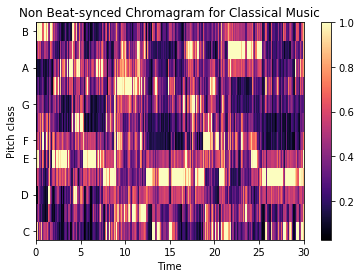

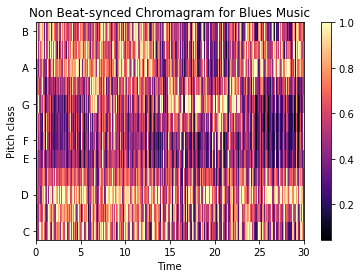

In [8]:
#gia to mel spectrogram me id 10044 (Classical)
plt.figure(1)
librosa.display.specshow(chromagram1,x_axis='time',y_axis='chroma')
plt.colorbar()
plt.title("Non Beat-synced Chromagram for Classical Music")
#gia to mel spectrogram me id 1044 (Blues)
plt.figure(2)
librosa.display.specshow(chromagram2,x_axis='time',y_axis='chroma')
plt.colorbar()
plt.title("Non Beat-synced Chromagram for Blues Music")
plt.show()

Παραπάνω βλέπουμε αυτό που αναφέραμε και προηγουμένως όσον αφορά τις συγχορδίες. Επειδή στην blues μουσική έχουμε χρήση συγχορδιών μπορεί σε μια χρονική στιγμή να έχουμε peaks σε αρκετές συχνότητες. Κάτι τέτοιο φαίνεται και εδώ όπου σε μια συγκεκριμένη χρονική διάρκεια μπορούμε να παρατηρήσουμε peaks σε παραπάνω από 2 νότες. Αντιθέτως, στην κλασική μουσική βλέπουμε ότι  σπάνια  έχουμε peaks την ίδια χρονική στιγμή σε διαφορετικές νότες (για τον λόγω οτι δεν υπάρχουν συχνά συγχορδίες).

Parakatw epanalamvanoume tin diadikasia gia beat-synce chromagrams.

Παρακάτω επαναλαμβάνουμε την διαδικασία για beat-sync chromagrams.

In [9]:
train_labels = pd.read_csv('../input/data/data/fma_genre_spectrograms_beat/train_labels.txt',header=0,sep='\t')
train_labels=np.asarray(train_labels)
#x=train_labels[:,1]=='Classical'
#print(train_labels[x])
spectrogram1_file = '../input/data/data/fma_genre_spectrograms_beat/train/16277.fused.full.npy.gz'
spectrogram2_file = '../input/data/data/fma_genre_spectrograms_beat/train/1044.fused.full.npy.gz'

with gzip.GzipFile(spectrogram1_file, 'r') as f:
    spectrograms1 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram1 = spectrograms1[:128]
chromagram1 = spectrograms1[128:]

with gzip.GzipFile(spectrogram2_file, 'r') as f:
    spectrograms2 = np.load(f)

# spectrograms contains a fused mel spectrogram and chromagram
# Decompose as follows
mel_spectrogram2 = spectrograms2[:128]
chromagram2 = spectrograms2[128:]
print("Genre of song with id 16277: ",train_labels[train_labels[:,0]=='16277.fused.full.npy.gz',1])
print("Genre of song with id 1044: ",train_labels[train_labels[:,0]=='1044.fused.full.npy.gz',1])

Genre of song with id 16277:  ['Classical']
Genre of song with id 1044:  ['Blues']


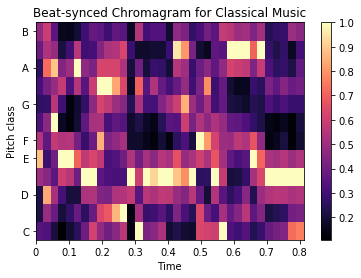

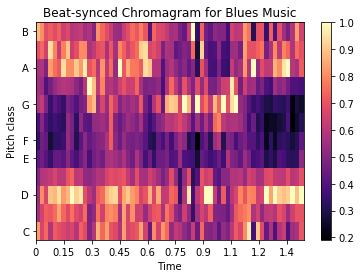

In [10]:
#gia to mel spectrogram me id 10044 (Classical)
plt.figure(1)
librosa.display.specshow(chromagram1,x_axis='time',y_axis='chroma')
plt.colorbar()
plt.title("Beat-synced Chromagram for Classical Music")
#gia to mel spectrogram me id 1044 (Blues)
plt.figure(2)
librosa.display.specshow(chromagram2,x_axis='time',y_axis='chroma')
plt.colorbar()
plt.title("Beat-synced Chromagram for Blues Music")
plt.show()

Τώρα φαίνεται η προηγούμενη παρατήρηση ακόμα πιο καθαρά. Εκεί που πέφτει το beat βλέπουμε ότι στην κλασική μουσική δεν παίζουν διαφορετικές νότες. Ενώ αντιθέτως στην blues έχουμε εμφανίση πολλών  νοτών εκεί που πέφτει το beat. Βέβαια η base νότα της συγχορδίας εμφανίζεται με ανοιχτό κίτρινο ως ισχυρή ενώ οι υπόλοιπες με πορτοκαλί καθώς δεν είναι τόσο ισχυρές αλλά αποτελούν μέρος της συγχορδίας.

**Βήμα 4:** Υλοποίηση Dataloader

In [11]:
import numpy as np
import gzip
import copy
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from torch.utils.data import SubsetRandomSampler, DataLoader
import os

class_mapping = {
    'Rock': 'Rock',
    'Psych-Rock': 'Rock',
    'Indie-Rock': None,
    'Post-Rock': 'Rock',
    'Psych-Folk': 'Folk',
    'Folk': 'Folk',
    'Metal': 'Metal',
    'Punk': 'Metal',
    'Post-Punk': None,
    'Trip-Hop': 'Trip-Hop',
    'Pop': 'Pop',
    'Electronic': 'Electronic',
    'Hip-Hop': 'Hip-Hop',
    'Classical': 'Classical',
    'Blues': 'Blues',
    'Chiptune': 'Electronic',
    'Jazz': 'Jazz',
    'Soundtrack': None,
    'International': None,
    'Old-Time': None
}


def torch_train_val_split(
        dataset, batch_train, batch_eval,
        val_size=.2, shuffle=True, seed=42):
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    val_split = int(np.floor(val_size * dataset_size))
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(indices)
    train_indices = indices[val_split:]
    val_indices = indices[:val_split]

    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset,
                              batch_size=batch_train,
                              sampler=train_sampler)
    val_loader = DataLoader(dataset,
                            batch_size=batch_eval,
                            sampler=val_sampler)
    return train_loader, val_loader


def read_spectrogram(spectrogram_file, chroma=True):
    with gzip.GzipFile(spectrogram_file, 'r') as f:
        spectrograms = np.load(f)
    # spectrograms contains a fused mel spectrogram and chromagram
    # Decompose as follows
    return spectrograms.T


class LabelTransformer(LabelEncoder):
    def inverse(self, y):
        try:
            return super(LabelTransformer, self).inverse_transform(y)
        except:
            return super(LabelTransformer, self).inverse_transform([y])

    def transform(self, y):
        try:
            return super(LabelTransformer, self).transform(y)
        except:
            return super(LabelTransformer, self).transform([y])

        
class PaddingTransform(object):
    def __init__(self, max_length, padding_value=0):
        self.max_length = max_length
        self.padding_value = padding_value

    def __call__(self, s):
        if len(s) == self.max_length:
            return s

        if len(s) > self.max_length:
            return s[:self.max_length]

        if len(s) < self.max_length:
            s1 = copy.deepcopy(s)
            pad = np.zeros((self.max_length - s.shape[0], s.shape[1]), dtype=np.float32)
            s1 = np.vstack((s1, pad))
            return s1

        
class SpectrogramDataset(Dataset):
    def __init__(self, path, class_mapping=None, train=True, max_length=-1):
        t = 'train' if train else 'test'
        p = os.path.join(path, t)
        self.index = os.path.join(path, "{}_labels.txt".format(t))
        self.files, labels = self.get_files_labels(self.index, class_mapping)
        self.feats = [read_spectrogram(os.path.join(p, f)) for f in self.files]
        self.feat_dim = self.feats[0].shape[1]
        self.lengths = [len(i) for i in self.feats]
        self.max_length = max(self.lengths) if max_length <= 0 else max_length
        self.zero_pad_and_stack = PaddingTransform(self.max_length)
        self.label_transformer = LabelTransformer()
        if isinstance(labels, (list, tuple)):
            self.labels = np.array(self.label_transformer.fit_transform(labels)).astype('int64')

    def get_files_labels(self, txt, class_mapping):
        with open(txt, 'r') as fd:
            lines = [l.rstrip().split('\t') for l in fd.readlines()[1:]]
        files, labels = [], []
        for l in lines:
            label = l[1]
            if class_mapping:
                label = class_mapping[l[1]]
            if not label:
                continue
            files.append(l[0])
            labels.append(label)
        return files, labels

    def __getitem__(self, item):
        l = min(self.lengths[item], self.max_length)
        return self.zero_pad_and_stack(self.feats[item]), self.labels[item], l

    def __len__(self):
        return len(self.labels)


In [12]:
BATCH_SZ=32

specs = SpectrogramDataset('../input/data/data/fma_genre_spectrograms_beat/', train=True, class_mapping=class_mapping, max_length=-1)
train_loader, val_loader = torch_train_val_split(specs, BATCH_SZ ,BATCH_SZ, val_size=0)
test_loader = DataLoader(SpectrogramDataset('../input/data/data/fma_genre_spectrograms_beat/', train=False, class_mapping=class_mapping, max_length=-1))

**Βήμα 5:** Χρησιμοποιούμε το LSTM που φτιάξαμε στο προηγούμενο εργαστήριο και προβλέπουμε τα 10 διαφορετικά είδη του beat synced FMA dataset.
Για την εκπαίδευση χρησιμοποιούμε και το validation set (δηλαδή δεν χωρίζουμε σε train και val). Εξετάζουμε απόδοση στο test set.

In [13]:

import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class BasicLSTM(nn.Module):
    def __init__(self, input_dim,rnn_size, output_dim, num_layers,dropout_type=None,dropout=0, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.dropout=dropout
        '''
        if dropout_type is not None:
            if dropout_type = 'Variational_Locked_Dropout'
            self.dropout = Variational_LockedDropout(dropout=dropout_prob)
        '''
            
        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers
        
        
        #for non-bidirectional:
        #we assume that rnn-size is the number of lstm-units...
        #input_dim is the vector that each unit will receive as input..
        #hidden_dim at basic lstm is the same as hidden_dim...
        #so we have...
        self.num_layers=num_layers
        self.hidden_dim = rnn_size # OR self.hidden_dim = self.feature_size
        if self.bidirectional:
            self.lstm = nn.LSTM(input_dim,self.hidden_dim//2,num_layers=num_layers,bidirectional=bidirectional,
                                dropout=self.dropout,batch_first=True)
        else:
            self.lstm = nn.LSTM(input_dim,self.hidden_dim,num_layers=num_layers,bidirectional=bidirectional,
                                dropout=self.dropout,batch_first=True)

        #using batch_first=True affects only the input!
        # if the input is at form seq_len,batch,features batch_first=True is not needed
        
        #self.hidden = self.init_hidden() #initialize hidden state(and cell state)
        
        #use a linear transformation from lstm hidden_state space to ouput space..
        #for digit classification we want to classify a sequence to 0-9 digits. So we will use as output dim the number 10.
        self.output_set_size = output_dim
        self.hidden2output = nn.Linear(self.hidden_dim,self.output_set_size)

    def forward(self, x, lengths):
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
        
        # --------------- Insert your code here ---------------- #
        
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network 
        lstm_out,_ = self.lstm(x)
        last_lstm_out = self.last_timestep(lstm_out,lengths)   
        out_space = self.hidden2output(last_lstm_out)
        return out_space

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if self.bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()

In [14]:
INPUT_SZ=140
NUM_CLASSES=10
NUM_LAYERS=1
HIDDEN_SIZE=60
DROPOUT=0

num_epochs=50

model = BasicLSTM(INPUT_SZ,HIDDEN_SIZE,NUM_CLASSES,NUM_LAYERS,dropout=DROPOUT,bidirectional=False)

In [15]:


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



for epoch in range(num_epochs):
    #no need to set requires_grad=True for parameters(weights) as it done by default. Also for input requires_grad is not
    #always necessary. So we comment the following line.
    #with torch.autograd(): 
    model.train()
    #scheduler.step()
    running_average_loss = 0

    #train model in each epoch
    for index,instance in enumerate(train_loader):
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        #features,labels,lengths=instance
        features = instance[:][0]
        labels = instance[:][1]
        lengths = instance[:][2]
        features = features.type(torch.FloatTensor)
        
        optimizer.zero_grad()
        
        # Step 3. Run our forward pass.
        prediction_vec = model(features,lengths)
        if(prediction_vec.shape[0]==10):
            prediction_vec=prediction_vec.unsqueeze_(0)
            lengths = lengths.unsqueeze_(0)
        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = criterion(prediction_vec,labels)
        loss.backward(retain_graph=True)
        optimizer.step()

        running_average_loss += loss.detach().item()
    print("Epoch: {} \t \t Training Loss {}".format(epoch, float(running_average_loss) / (index + 1)))


Epoch: 0 	 	 Training Loss 2.245497252843151
Epoch: 1 	 	 Training Loss 2.2125477562211966
Epoch: 2 	 	 Training Loss 2.204137540843389
Epoch: 3 	 	 Training Loss 2.199643219987007
Epoch: 4 	 	 Training Loss 2.185037805609507
Epoch: 5 	 	 Training Loss 2.1766670158464616
Epoch: 6 	 	 Training Loss 2.174913069973253
Epoch: 7 	 	 Training Loss 2.198311528114423
Epoch: 8 	 	 Training Loss 2.1800279029428142
Epoch: 9 	 	 Training Loss 2.1750126881142187
Epoch: 10 	 	 Training Loss 2.191173986212848
Epoch: 11 	 	 Training Loss 2.1832634030956113
Epoch: 12 	 	 Training Loss 2.201591565184397
Epoch: 13 	 	 Training Loss 2.2025747887075764
Epoch: 14 	 	 Training Loss 2.1952125960833406
Epoch: 15 	 	 Training Loss 2.1907146466921454
Epoch: 16 	 	 Training Loss 2.17803282770392
Epoch: 17 	 	 Training Loss 2.183402606885727
Epoch: 18 	 	 Training Loss 2.2122653543132627
Epoch: 19 	 	 Training Loss 2.21775687883978
Epoch: 20 	 	 Training Loss 2.2193457296449846
Epoch: 21 	 	 Training Loss 2.201786

In [16]:
"""
model.eval()
acc = 0
n_samples = 0
with torch.no_grad():
    for index, batch in enumerate(val_loader):
        features = batch[:][0]
        labels = batch[:][1]
        lengths = batch[:][2]
        features = features.type(torch.FloatTensor)
        #print(features.shape)
        out = model(features,lengths)
        #print(out[0])
        out_scores = F.log_softmax(out,dim=1)
        #print(out_scores[0])
        value, y_pred = out_scores.max(1)
        
        acc += (labels == y_pred).sum().detach().item()
        n_samples += features.shape[0]

print("Score for validation set: " ,acc / n_samples)
"""

'\nmodel.eval()\nacc = 0\nn_samples = 0\nwith torch.no_grad():\n    for index, batch in enumerate(val_loader):\n        features = batch[:][0]\n        labels = batch[:][1]\n        lengths = batch[:][2]\n        features = features.type(torch.FloatTensor)\n        #print(features.shape)\n        out = model(features,lengths)\n        #print(out[0])\n        out_scores = F.log_softmax(out,dim=1)\n        #print(out_scores[0])\n        value, y_pred = out_scores.max(1)\n        \n        acc += (labels == y_pred).sum().detach().item()\n        n_samples += features.shape[0]\n\nprint("Score for validation set: " ,acc / n_samples)\n'

**Βήμα 6:** Αξιολόγηση του μοντέλου.

In [17]:
model.eval()
acc = 0
n_samples = 0
with torch.no_grad():
    for index, batch in enumerate(test_loader):
        features = batch[:][0]
        labels = batch[:][1]
        lengths = batch[:][2]
        features = features.type(torch.FloatTensor)
        #print(features.shape)
        out = model(features,lengths)
        #print(out.shape)
        out_scores = F.log_softmax(out,dim=0)
        
        value, y_pred = out_scores.max(0)

        acc += (labels == y_pred).sum().detach().item()
        n_samples += features.shape[0]

print("Score for test set: " ,acc / n_samples)

Score for test set:  0.22434782608695653


**Βήμα 7:** CNN-1d+LSTM με χρήση του non beat-synced FMA dataset.

In [18]:
BATCH_SZ=32

specs = SpectrogramDataset('../input/data/data/fma_genre_spectrograms/', train=True, class_mapping=class_mapping, max_length=-1)
train_loader, val_loader = torch_train_val_split(specs, BATCH_SZ ,BATCH_SZ, val_size=.33)
test_loader = DataLoader(SpectrogramDataset('../input/data/data/fma_genre_spectrograms/', train=False, class_mapping=class_mapping, max_length=-1))

In [19]:
class ConvLSTM(nn.Module):
    def __init__(self,input_channels,out_channels,kernel_sz,stride,padding, num_classes,input_dim,rnn_size, output_dim, num_layers,dropout_type=None,dropout=0, bidirectional=False):
        super(ConvLSTM, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(input_channels, out_channels, kernel_size=kernel_sz, stride=stride, padding=padding),
            #nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.dropout=dropout
        '''
        if dropout_type is not None:
            if dropout_type = 'Variational_Locked_Dropout'
            self.dropout = Variational_LockedDropout(dropout=dropout_prob)
        '''
            
        # --------------- Insert your code here ---------------- #
        # Initialize the LSTM, Dropout, Output layers
        
        
        #for non-bidirectional:
        #we assume that rnn-size is the number of lstm-units...
        #input_dim is the vector that each unit will receive as input..
        #hidden_dim at basic lstm is the same as hidden_dim...
        #so we have...
        self.num_layers=num_layers
        self.hidden_dim = rnn_size # OR self.hidden_dim = self.feature_size
        if self.bidirectional:
            self.lstm = nn.LSTM(input_dim,self.hidden_dim//2,num_layers=num_layers,bidirectional=bidirectional,
                                dropout=self.dropout,batch_first=True)
        else:
            self.lstm = nn.LSTM(input_dim,self.hidden_dim,num_layers=num_layers,bidirectional=bidirectional,
                                dropout=self.dropout,batch_first=True)

        #using batch_first=True affects only the input!
        # if the input is at form seq_len,batch,features batch_first=True is not needed
        
        #self.hidden = self.init_hidden() #initialize hidden state(and cell state)
        
        #use a linear transformation from lstm hidden_state space to ouput space..
        #for digit classification we want to classify a sequence to 0-9 digits. So we will use as output dim the number 10.
        self.output_set_size = output_dim
        self.hidden2output = nn.Linear(self.hidden_dim,self.output_set_size)
        
    def forward(self, x,lengths):
  
        #print(x.shape)
        x = x.transpose(1, 2)
        #print(x.shape)
        out = self.layer1(x)
        out = out.transpose(1, 2)
        #print(out.shape)
        newlengths = torch.ones(out.shape[0])
        newlengths=newlengths * (out.shape[1])
        #print(newlengths)
        newlengths = newlengths.type(torch.LongTensor)
        
       
        
        lstm_out,_ = self.lstm(out)
        #print(lstm_out.shape)
        last_lstm_out = self.last_timestep(lstm_out,newlengths)   
        out_space = self.hidden2output(last_lstm_out)
        
        #print(out_space.shape)
        #out_space = self.hidden2output(lstm_out)
        
        return out_space
        
    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if self.bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()
    


In [20]:

num_epochs=35
kernel_sz=3
input_channels=140
out_channels=60
stride=2
padding=2
num_classes=10

INPUT_SZ=out_channels
NUM_CLASSES=10
NUM_LAYERS=1
HIDDEN_SIZE=40
DROPOUT=0

model2 = ConvLSTM(input_channels,out_channels,kernel_sz,stride,padding ,num_classes,INPUT_SZ,HIDDEN_SIZE,NUM_CLASSES,NUM_LAYERS,dropout=DROPOUT,bidirectional=False)


In [21]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)



for epoch in range(num_epochs):
    #no need to set requires_grad=True for parameters(weights) as it done by default. Also for input requires_grad is not
    #always necessary. So we comment the following line.
    #with torch.autograd(): 
    model2.train()
    #scheduler.step()
    running_average_loss = 0

    #train model in each epoch
    for index,instance in enumerate(train_loader):
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        #features,labels,lengths=instance
        features = instance[:][0]
        labels = instance[:][1]
        lengths = instance[:][2]
        features = features.type(torch.FloatTensor)
       
        optimizer.zero_grad()
        
        # Step 3. Run our forward pass.
        prediction_vec = model2(features,lengths)
        #print(prediction_vec.shape)
        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        
        loss = criterion(prediction_vec,labels)
        loss.backward(retain_graph=True)
        optimizer.step()

        running_average_loss += loss.detach().item()
    print("Epoch: {} \t \t Training Loss {}".format(epoch, float(running_average_loss) / (index + 1)))

Epoch: 0 	 	 Training Loss 2.2938413084769738
Epoch: 1 	 	 Training Loss 2.251717839922224
Epoch: 2 	 	 Training Loss 2.236443908847108
Epoch: 3 	 	 Training Loss 2.2251253079394906
Epoch: 4 	 	 Training Loss 2.2226946499882914
Epoch: 5 	 	 Training Loss 2.2211530013960235
Epoch: 6 	 	 Training Loss 2.225088975867447
Epoch: 7 	 	 Training Loss 2.2215405337664547
Epoch: 8 	 	 Training Loss 2.2192701368915793
Epoch: 9 	 	 Training Loss 2.2202618705983066
Epoch: 10 	 	 Training Loss 2.2205970190009294
Epoch: 11 	 	 Training Loss 2.2198483287071693
Epoch: 12 	 	 Training Loss 2.216754290522361
Epoch: 13 	 	 Training Loss 2.2163160041886933
Epoch: 14 	 	 Training Loss 2.217624245857706
Epoch: 15 	 	 Training Loss 2.218439379516913
Epoch: 16 	 	 Training Loss 2.2168188776288713
Epoch: 17 	 	 Training Loss 2.219213149985489
Epoch: 18 	 	 Training Loss 2.2128954031029524
Epoch: 19 	 	 Training Loss 2.2126059386194967
Epoch: 20 	 	 Training Loss 2.2160528922567564
Epoch: 21 	 	 Training Loss 2.

Αξιολόγηση σε validation και test set.

In [22]:
model2.eval()
acc = 0
n_samples = 0
with torch.no_grad():
    for index, batch in enumerate(val_loader):
        features = batch[:][0]
        labels = batch[:][1]
        lengths = batch[:][2]
        features = features.type(torch.FloatTensor)
        #print(features.shape)
        out = model2(features,lengths)
      
        out_scores = F.log_softmax(out,dim=1)
        value, y_pred = out_scores.max(1)

        acc += (labels == y_pred).sum().detach().item()
        n_samples += features.shape[0]

print("Score for validation set: " ,acc / n_samples)

Score for validation set:  0.1723684210526316


In [23]:
model2.eval()
acc = 0
n_samples = 0
with torch.no_grad():
    for index, batch in enumerate(test_loader):
        features = batch[:][0]
        labels = batch[:][1]
        lengths = batch[:][2]
        features = features.type(torch.FloatTensor)
        #print(features.shape)
        out = model2(features,lengths)
        #print(out.shape)
        out_scores = F.log_softmax(out,dim=0)
        
        value, y_pred = out_scores.max(0)

        acc += (labels == y_pred).sum().detach().item()
        n_samples += features.shape[0]

print("Score for test set: " ,acc / n_samples)

Score for test set:  0.1791304347826087


**ΠΡΟΣΟΧΗ:** Τα επόμενα βήματα βρίσκονται σε ξεχωριστά kernels.